In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [158]:
# read file 
df = pd.read_csv("rawData.csv")

In [159]:
# check head
df.head()

,Date,Time,Temperature,Humidity,Luminosity
0,2021-11-4,18:00:00,21.5,34.1,very bright
1,2021-11-4,18:00:00,21.5,17.5,very bright
2,2021-11-4,18:00:00,21.5,35.6,very bright
3,2021-11-4,18:00:00,21.6,35.2,very bright
4,2021-11-4,18:00:00,21.6,34.6,very bright


In [160]:
'''
#Rename first column
df = df.rename(columns={'2021-10-4': 'Date', '18:00:00': 'Time', '21.50': 'Temperature', '33.00' : 'Humidity', 'bright' : 'Luminosity'})
'''

"\n#Rename first column\ndf = df.rename(columns={'2021-10-4': 'Date', '18:00:00': 'Time', '21.50': 'Temperature', '33.00' : 'Humidity', 'bright' : 'Luminosity'})\n"

In [161]:
# check head
df.head()

,Date,Time,Temperature,Humidity,Luminosity
0,2021-11-4,18:00:00,21.5,34.1,very bright
1,2021-11-4,18:00:00,21.5,17.5,very bright
2,2021-11-4,18:00:00,21.5,35.6,very bright
3,2021-11-4,18:00:00,21.6,35.2,very bright
4,2021-11-4,18:00:00,21.6,34.6,very bright


In [162]:
'''
#Correcting wrong date
for i in range(len(df['Date'])):
    df['Date'][i] = df['Date'][i].replace('-10-', '-11-')
'''

"\n#Correcting wrong date\nfor i in range(len(df['Date'])):\n    df['Date'][i] = df['Date'][i].replace('-10-', '-11-')\n"

In [163]:
df.head()

,Date,Time,Temperature,Humidity,Luminosity
0,2021-11-4,18:00:00,21.5,34.1,very bright
1,2021-11-4,18:00:00,21.5,17.5,very bright
2,2021-11-4,18:00:00,21.5,35.6,very bright
3,2021-11-4,18:00:00,21.6,35.2,very bright
4,2021-11-4,18:00:00,21.6,34.6,very bright


In [164]:
#export to csv
#df.to_csv('test2.csv', index=False)

In [165]:
#Add date string and time string togheter
df['Date'] + ' ' + df['Time']

0        2021-11-4 18:00:00
1        2021-11-4 18:00:00
2        2021-11-4 18:00:00
3        2021-11-4 18:00:00
4        2021-11-4 18:00:00
               ...         
4244    2021-11-10 14:00:00
4245    2021-11-10 14:00:00
4246    2021-11-10 14:00:00
4247    2021-11-10 14:00:00
4248    2021-11-10 14:00:00
Length: 4249, dtype: object

In [166]:
#Make date and time into one column with datetime as dtype
DateTime = pd.to_datetime(df['Date'] + ' ' + df['Time'])
DateTime

0      2021-11-04 18:00:00
1      2021-11-04 18:00:00
2      2021-11-04 18:00:00
3      2021-11-04 18:00:00
4      2021-11-04 18:00:00
               ...        
4244   2021-11-10 14:00:00
4245   2021-11-10 14:00:00
4246   2021-11-10 14:00:00
4247   2021-11-10 14:00:00
4248   2021-11-10 14:00:00
Length: 4249, dtype: datetime64[ns]

In [167]:
df.dtypes

Date            object
Time            object
Temperature    float64
Humidity       float64
Luminosity      object
dtype: object

In [168]:
#drop old coulumns
df = df.drop(['Date', 'Time'], axis=1)
df

,Temperature,Humidity,Luminosity
0,21.5,34.1,very bright
1,21.5,17.5,very bright
2,21.5,35.6,very bright
3,21.6,35.2,very bright
4,21.6,34.6,very bright
...,...,...,...
4244,20.8,34.4,very bright
4245,20.8,34.5,very bright
4246,20.8,34.5,very bright
4247,20.7,34.6,very bright


In [169]:
#Insert DateTime as new coulumn
df.insert(0, "DateTime", DateTime)

In [170]:
df.dtypes

DateTime       datetime64[ns]
Temperature           float64
Humidity              float64
Luminosity             object
dtype: object

In [171]:
df

,DateTime,Temperature,Humidity,Luminosity
0,2021-11-04 18:00:00,21.5,34.1,very bright
1,2021-11-04 18:00:00,21.5,17.5,very bright
2,2021-11-04 18:00:00,21.5,35.6,very bright
3,2021-11-04 18:00:00,21.6,35.2,very bright
4,2021-11-04 18:00:00,21.6,34.6,very bright
...,...,...,...,...
4244,2021-11-10 14:00:00,20.8,34.4,very bright
4245,2021-11-10 14:00:00,20.8,34.5,very bright
4246,2021-11-10 14:00:00,20.8,34.5,very bright
4247,2021-11-10 14:00:00,20.7,34.6,very bright


<AxesSubplot:xlabel='DateTime', ylabel='Temperature'>

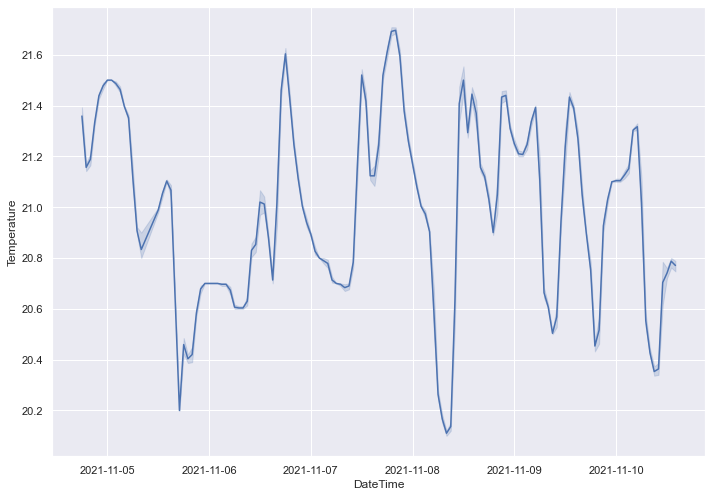

In [172]:
#plot temperature
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df, x='DateTime', y="Temperature")

<AxesSubplot:xlabel='DateTime', ylabel='Humidity'>

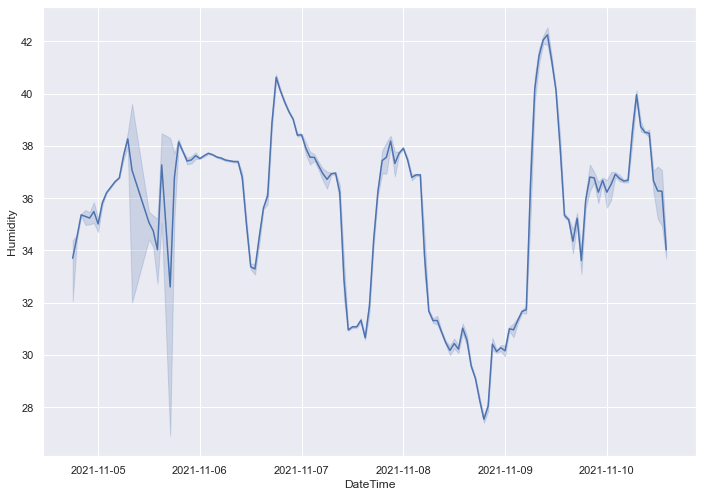

In [173]:
#plot humitity
sns.lineplot(data=df, x='DateTime', y="Humidity")

<AxesSubplot:xlabel='DateTime'>

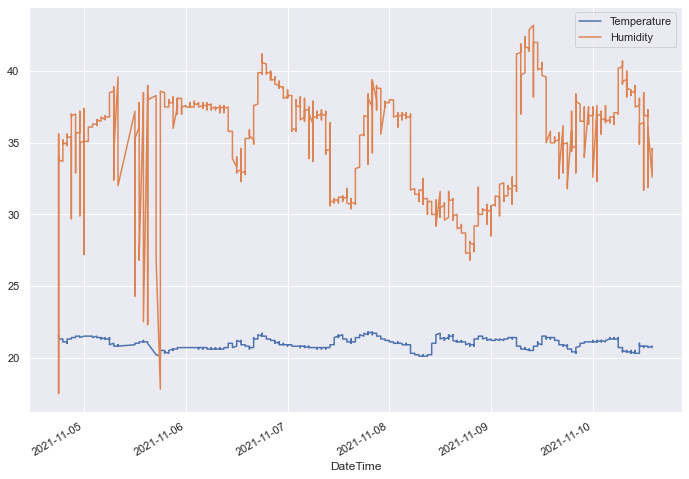

In [174]:
#df = df.melt('DateTime', var_name='cols', value_name='vals')
df.plot(x="DateTime", y=["Temperature", "Humidity"], kind="line")

In [175]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.shape[0]).sort_values(ascending = False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data



,Total,Percent
Luminosity,1,0.000235
DateTime,0,0.000000
Temperature,0,0.000000
Humidity,0,0.000000


In [176]:
df.dropna()

,DateTime,Temperature,Humidity,Luminosity
0,2021-11-04 18:00:00,21.5,34.1,very bright
1,2021-11-04 18:00:00,21.5,17.5,very bright
2,2021-11-04 18:00:00,21.5,35.6,very bright
3,2021-11-04 18:00:00,21.6,35.2,very bright
4,2021-11-04 18:00:00,21.6,34.6,very bright
...,...,...,...,...
4244,2021-11-10 14:00:00,20.8,34.4,very bright
4245,2021-11-10 14:00:00,20.8,34.5,very bright
4246,2021-11-10 14:00:00,20.8,34.5,very bright
4247,2021-11-10 14:00:00,20.7,34.6,very bright


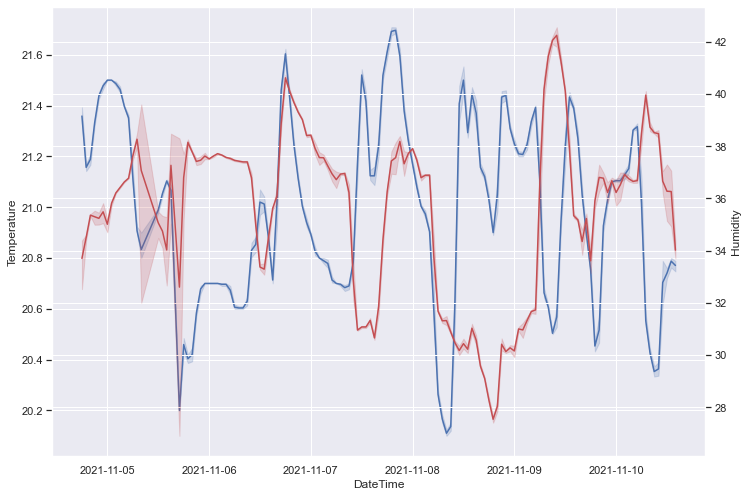

In [177]:
fig, ax = plt.subplots()
sns.lineplot(x='DateTime', y='Temperature', data=df, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x='DateTime', y='Humidity', data=df, ax=ax2, color='r')
plt.show()

In [182]:
'''
for i in range(len(df['Luminosity'])):
    if df['Date'][i] == 'very bright':
        i.replace('very bright', 4)
    elif i == 'bright':
        i.replace('bright', 3)
    elif i == 'dim':
        i.replace('dim', 2)
    elif i == 'dark':
        i.replace('dim', 1)
    elif i == 'pitch black':
        i.replace('pitch black', 0)
#Correcting wrong date
for i in range(len(df['Date'])):
    df['Date'][i] = df['Date'][i].replace('-10-', '-11-')
'''

In [186]:
#a = df.replace({"Luminosity": {"pitch black": 0, "dark": 1, "dim": 2, "bright": 3, "very bright": 4}})
#a

,DateTime,Temperature,Humidity,Luminosity
0,2021-11-04 18:00:00,21.5,34.1,4
1,2021-11-04 18:00:00,21.5,17.5,4
2,2021-11-04 18:00:00,21.5,35.6,4
3,2021-11-04 18:00:00,21.6,35.2,4
4,2021-11-04 18:00:00,21.6,34.6,4
...,...,...,...,...
4244,2021-11-10 14:00:00,20.8,34.4,4
4245,2021-11-10 14:00:00,20.8,34.5,4
4246,2021-11-10 14:00:00,20.8,34.5,4
4247,2021-11-10 14:00:00,20.7,34.6,4


TypeError: Neither the `x` nor `y` variable appears to be numeric.

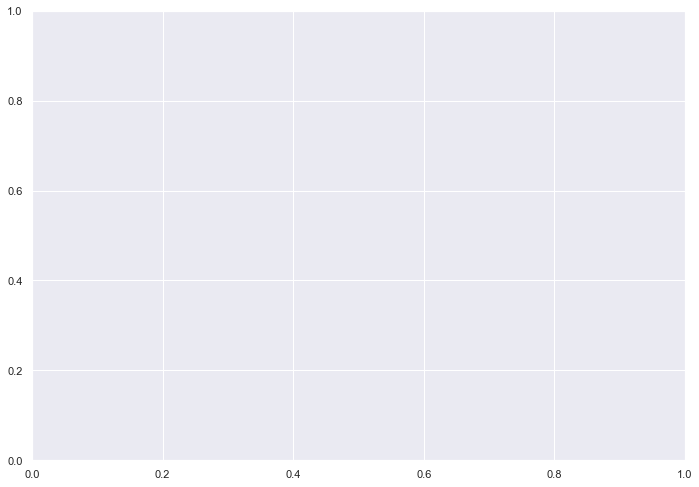